## Time Series Made Easy in Python USing Darts Library

In [1]:
# !pip install darts

In [2]:
from darts.datasets import AirPassengersDataset, MonthlyMilkDataset

In [3]:
AirPassengersDataset().load().pd_series()

Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
              ...  
1960-08-01    606.0
1960-09-01    508.0
1960-10-01    461.0
1960-11-01    390.0
1960-12-01    432.0
Freq: MS, Length: 144, dtype: float64

In [4]:
import matplotlib.pyplot as plt

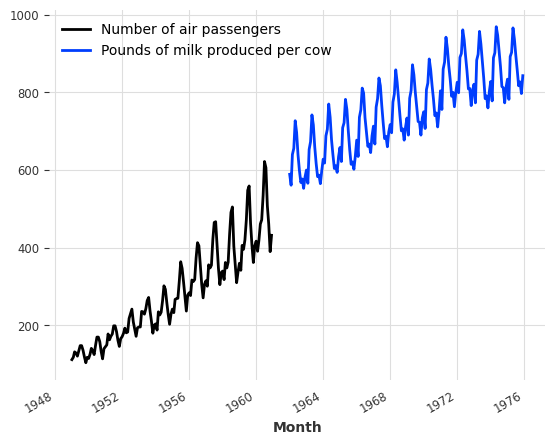

In [5]:

series_air = AirPassengersDataset().load()
series_milk = MonthlyMilkDataset().load()

series_air.plot(label='Number of air passengers')
series_milk.plot(label='Pounds of milk produced per cow')
plt.legend()

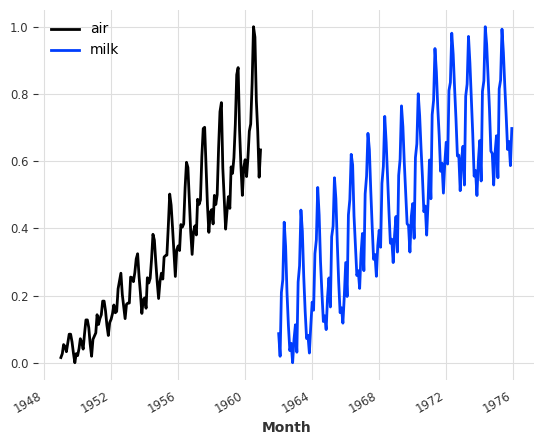

In [6]:
from darts.dataprocessing.transformers import Scaler
scaler_air, scaler_milk = Scaler(), Scaler()
series_air_scaled = scaler_air.fit_transform(series_air)
series_milk_scaled = scaler_milk.fit_transform(series_milk)

series_air_scaled.plot(label='air')
series_milk_scaled.plot(label='milk')
plt.legend()

In [7]:
len(series_air_scaled), len(series_milk_scaled)

(144, 168)

In [8]:
# Train And Validation Split
train_air, check_air, val_air = series_air_scaled[:-60], series_air_scaled[-60:-30], series_air_scaled[-30:]
train_milk, check_milk, val_milk = series_milk_scaled[:-60], series_milk_scaled[-60:-30], series_milk_scaled[-30:]

In [9]:
from darts import TimeSeries
from darts.utils.timeseries_generation import gaussian_timeseries, linear_timeseries, sine_timeseries
from darts.models import RNNModel, TCNModel, TransformerModel, NBEATSModel, BlockRNNModel
from darts.metrics import mape, smape

c:\Users\Mukund Mishra\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
model_air_milk = NBEATSModel(input_chunk_length=24, output_chunk_length=12, n_epochs=10, random_state=0)


In [11]:
listtt = [train_air, train_milk]

In [12]:
model_air_milk.fit(listtt, verbose=True)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.2 M 
---------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
49.575    Total estimated model params size (MB)


Epoch 9: 100%|██████████| 5/5 [00:01<00:00,  3.45it/s, loss=0.0042, train_loss=0.00252] 

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 5/5 [00:01<00:00,  3.43it/s, loss=0.0042, train_loss=0.00252]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]
MAPE = 11.47%


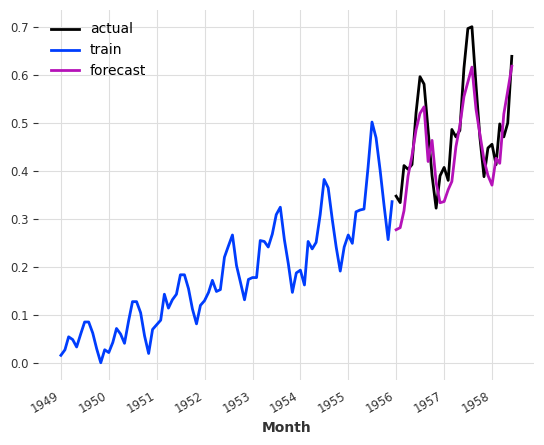

In [13]:
pred = model_air_milk.predict(n=30, series=train_air)

check_air.plot(label='actual')
train_air.plot(label = 'train')

pred.plot(label='forecast')
plt.legend()
print('MAPE = {:.2f}%'.format(mape(series_air_scaled, pred)))

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 16.17it/s]
MAPE = 16.37%


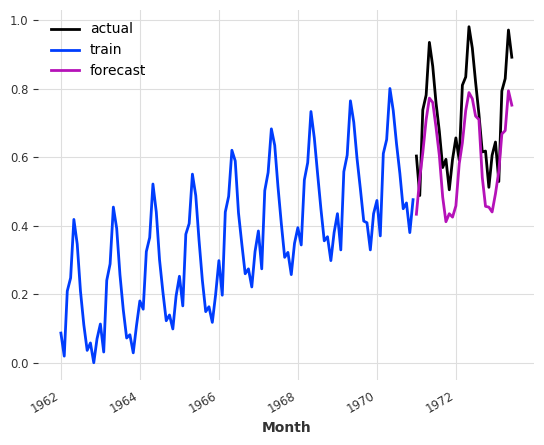

In [14]:
pred = model_air_milk.predict(n=30, series=train_milk)

check_milk.plot(label='actual')
train_milk.plot(label='train')
pred.plot(label='forecast')
plt.legend()
print('MAPE = {:.2f}%'.format(mape(series_milk_scaled, pred)))

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 14.84it/s]


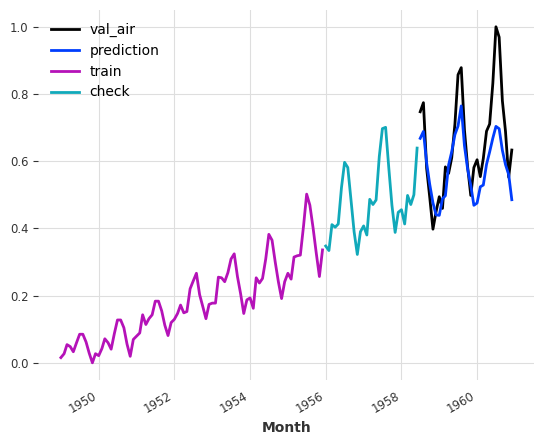

In [15]:
pred = model_air_milk.predict(n=30, series=check_air)
val_air.plot(label='val_air')
pred.plot(label='prediction')
train_air.plot(label='train')
check_air.plot(label='check')
plt.legend()

In [16]:
import pickle 

In [40]:
model_air_milk.save('mymodel.pkl')

In [41]:
import darts.models as md


In [42]:
import tensorflow as tf


In [43]:
modelbykrish = tf.keras.models.load_model('mymodel.pkl')

OSError: Unable to open file (file signature not found)

In [45]:
model_air_milk.save('abcd.pt')

In [46]:
loaded = NBEATSModel.load('abcd.pt') 

In [17]:
pickle.dump(model_air_milk, open('krish_model.pkl', 'wb'))

In [18]:
modelbykrish = pickle.load(open('krish_model.pkl', 'rb'))

In [19]:
modelbykrish

In [20]:
import numpy as np 
xyz = train_air[-36:]

In [21]:
modelbykrish.fit(series=xyz)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.2 M 
---------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
49.575    Total estimated model params size (MB)


Epoch 9: 100%|██████████| 1/1 [00:00<00:00,  4.25it/s, loss=0.386, train_loss=0.0701]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 1/1 [00:00<00:00,  4.13it/s, loss=0.386, train_loss=0.0701]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00,  6.90it/s]


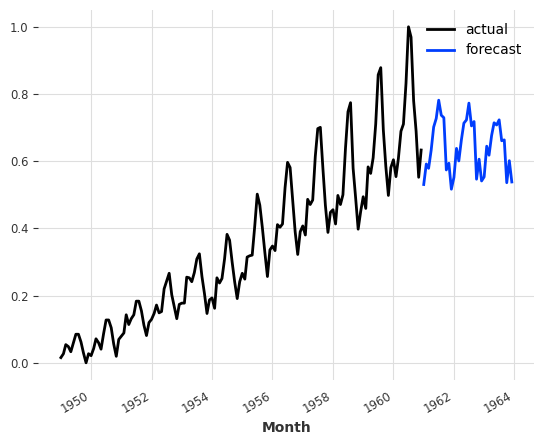

In [47]:
pred = loaded.predict(n=36, series=series_air_scaled)

series_air_scaled.plot(label='actual')
pred.plot(label='forecast')
plt.legend()
# print('MAPE = {:.2f}%'.format(mape(series_milk_scaled, pred)))
